In [ ]:
"...## => #".split()

In [46]:
initial_state = "#.#..#..###.###.#..###.#####...########.#...#####...##.#....#.####.#.#..#..#.#..###...#..#.#....##."
rules = """#.### => .
###.# => #
.##.. => .
..### => .
..##. => .
##... => #
###.. => #
.#... => #
##..# => #
#.... => .
.#.#. => .
####. => .
#.#.. => .
#.#.# => .
#..## => #
.#### => #
...## => .
#..#. => #
.#.## => #
..#.# => #
##.#. => #
#.##. => #
##### => .
..#.. => #
....# => .
##.## => .
.###. => #
..... => .
...#. => #
.##.# => .
#...# => .
.#..# => #"""

rules = {rule.split()[0]: rule.split()[2] for rule in rules.split('\n')}
assert len(rules) == 32
padding = "...."
assert rules["....."] == "."

age = [{}]

def update_age(t, i, os, ns):
    if ns == os and ns == '#':
        age[t+1][i] = age[t][i] + 1
    #elif ns != os and ns == '.':
    #    age[t+1][i] = -1
    elif ns != os and ns == '#':
        age[t+1][i] = 0

def apply(rules, state, n=20):
    zero_index = 0
    for t in range(n):
        age.append({})
        state = padding + str(state) + padding # pad
        new_state = list(state)
        zero_index += len(padding)
        for i in range(2,len(state)-2):
            pattern = state[i-2:i+2+1]
            ns = rules[pattern]
            os = new_state[i]
            update_age(t, i-zero_index, os, ns)   
            new_state[i] = ns
        new_state = "".join(new_state)
        #print(new_state, "\n" + zero_index*" " + "^")
        if new_state == state:
            print('steady state')
            return state, zero_index
        state = new_state
    
    
        #if (t+1)%1000 == 0 or t+1 == 20:
        #    n_plants = sum([i-zero_index for i in range(len(state)) if state[i] == '#'])
        #    print(t+1, n_plants, end=';')
    
        for i, c in enumerate(state):
            if c != '.':
                state = state[i:]  # strip left and keep count
                state = state.strip()
                zero_index -= i
                #print('strip:')
                #print(state, "\n" + zero_index*" " + "^", zero_index)
                break
    
    return state, zero_index

#initial_state = "#..#.#..##......###...###"
print(initial_state)
for i, c in enumerate(initial_state):
    update_age(-1, i, '.', c)

state, zero_index = apply(rules, initial_state, 200)
print(zero_index)
indices_with_plants = [i-zero_index for i in range(len(state)) if state[i] == '#']
print(indices_with_plants)
sum(indices_with_plants)

#.#..#..###.###.#..###.#####...########.#...#####...##.#....#.####.#.#..#..#.#..###...#..#.#....##.
-114
[114, 115, 116, 118, 123, 124, 125, 129, 130, 131, 136, 137, 138, 145, 146, 147, 152, 153, 154, 159, 160, 161, 166, 167, 168, 173, 174, 175, 183, 184, 185, 190, 191, 192, 199, 200, 201, 205, 206, 207, 216, 217, 218, 225, 226, 227, 239, 240, 241, 248, 249, 250, 255, 256, 257, 261, 262, 263, 267, 268, 269, 277, 278, 279, 283, 284, 285, 289, 290, 291, 295, 296, 297]


14977

In [47]:
#import matplotlib.pyplot as plt
#min(age[15].keys())
minx = min([min(x.keys()) for x in age])
maxx = max([max(x.keys()) for x in age])
sizex = maxx-minx+1
sizey = len(age)
#print('maxage', max([max(x.values()) for x in age]))

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:1133: RuntimeWarning: invalid value encountered in greater
  masked = np.abs(a) > self.linthresh


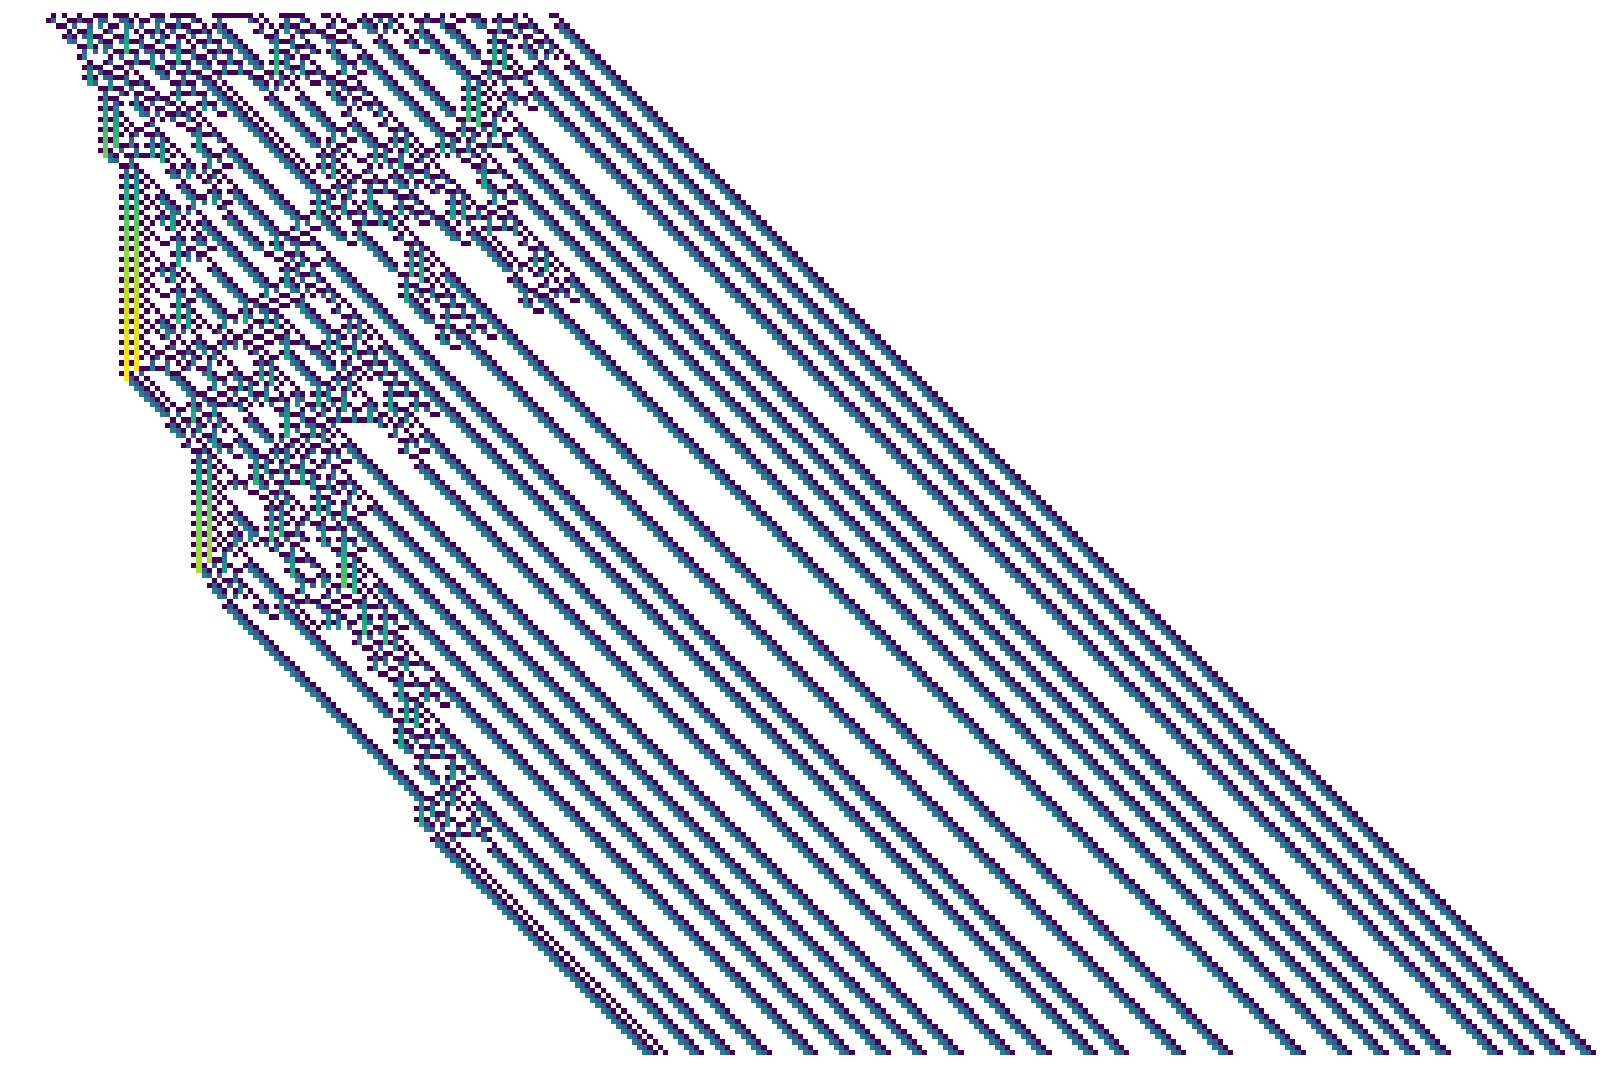

In [79]:
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import numpy as np
a = np.nan*np.zeros((sizex, sizey))
for y, d in enumerate(age):
    for x, cell_age in d.items():
        a[x-minx, y] = cell_age

plt.style.use('default')
plt.figure(figsize=(20, 20))
plt.axis('off')
palette = plt.cm.viridis#.reversed()
palette.set_bad ('w',1.0)

plt.imshow(a.T, interpolation='none', norm=SymLogNorm(linthresh=1, vmin=0, vmax=42), cmap='viridis')
#plt.tight_layout()